## Cat vs Dog

In [1]:
# !pip install --upgrade pip
# !pip install --upgrade --force-reinstall fastai

!pip install -Uqq fastai

import os
from fastai.vision.all import *

In [2]:
os.getcwd()

'/tf'

## Step 1: Load Data

In [3]:
PATH = 'cats_and_dogs'
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')
test_image= os.path.join(train_dir,'cats','cat.0.jpg')
# total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
# total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
# total_test = len(os.listdir(test_dir))
total_train = len(get_image_files(train_dir))
total_val = len(get_image_files(validation_dir))
total_test = len(get_image_files(test_dir))
im = Image.open(test_image)
im.to_thumb(256,256)
print(total_train, total_val, total_test)
total_train_and_val=len(get_image_files(train_dir) + get_image_files(validation_dir))
print(total_train_and_val)

2000 1000 50
3000


2000
1000


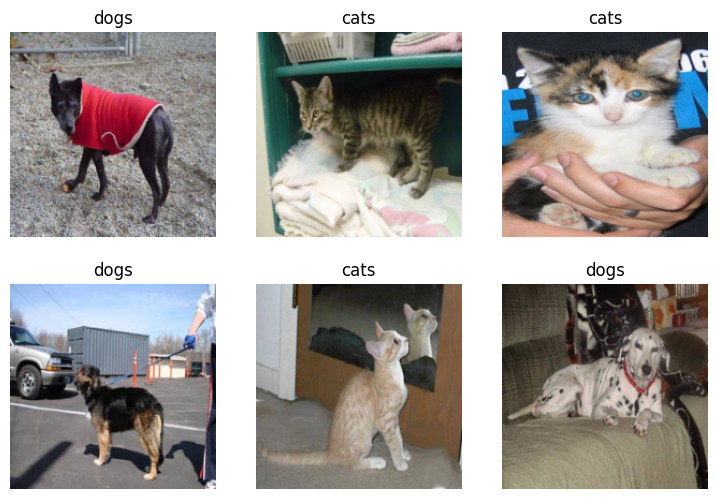

In [4]:
def get_my_files(x):
    return get_image_files(train_dir) + get_image_files(validation_dir) 
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_my_files, 
    splitter=GrandparentSplitter(train_name="train",valid_name = "validation"),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(PATH, bs=128)

print(len(dls.train_ds))
print(len(dls.valid_ds))
dls.show_batch(max_n=6)

## Step 2: Train the model

In [5]:
learn = vision_learner(dls, resnet50, metrics=error_rate)
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.428795,0.059056,0.016000,00:05


epoch,train_loss,valid_loss,error_rate,time
0,0.061340,0.051918,0.018000,00:05
1,0.036520,0.052639,0.017000,00:05
2,0.022865,0.040043,0.014000,00:05
3,0.015254,0.033529,0.010000,00:05
4,0.012678,0.032309,0.011000,00:05


## Step 3: Use the Model

In [6]:
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]
correct = 0
ans_count=len(answers)

count=0
for folders, sub_folders, files in os.walk(test_dir):
    for i in (sorted(files)):
        a,_,probs = learn.predict(PILImage.create(os.path.join(test_dir,i)))
        if a == 'dogs':
            ans=1
        elif a == 'cats':
            ans=0
        if ans==answers[count]:
            correct+=1
            count +=1
        else:
            count+=1
percentage_identified=correct/ans_count * 100
print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

Your model correctly identified 98.0% of the images of cats and dogs.
